### Importimg necessary libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import the Data

In [2]:
data = pd.read_excel('Case_Study_Data.xlsx')

In [3]:
# Display the first 5 rows
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0


# Section 1: Data Cleaning and Preparation

### Data Quality Assessment

#### 1. Checking for missing values

In [4]:
missing_values = data.isnull().sum()
missing_values

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

#### 2. Checking for Duplicates

In [5]:
duplicate_rows = int(data.duplicated().sum())
duplicate_rows

3524

#### 3. Checking the Data Types

In [6]:
print(data.dtypes)

DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
dtype: object


### Summary of Issues Found

* There are 8 missing values in the UNIT PRICE column. Since the rows with missing values are few, they can be dropped without significantly affecting the data size or quality.
* There dataset initially has 3,524 duplicates that must be dropped.
* The columns have correct data types.

### Resolving the Issues

#### 1. Dropping Duplicates

In [7]:
data = data.drop_duplicates()

#### 2. Dropping Rows with Missing Values

In [8]:
data.dropna(axis = 0, inplace = True)

### Featute Engineering

#### Creating “Month-Year” Column(e.g., August 2024) from the “DATE” column.

In [9]:
# Create the 'Month-Year' column
data['Month-Year'] = data['DATE'].dt.strftime('%B %Y')

In [10]:
# Displaying the last 5 rows
data.tail(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
333398,2024-11-13 13:59:00,Category-121,Product-898d,Business-0e99,Location-689f,5,1360.0,November 2024
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0,August 2024
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0,August 2024
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0,October 2024
333404,2024-10-10 18:19:00,Category-75,Product-b31e,Business-2693,Location-b27b,1,4420.0,October 2024


# Section 2: Exploratory Data Analysis

### 1. Sales Overview:

In [11]:
# Calculate the Value column as Quantity * Unit Price
data['VALUE'] = data['QUANTITY'] * data['UNIT PRICE']

# Grouping by 'ANONYMIZED CATEGORY' and 'ANONYMIZED BUSINESS', and calculate total Quantity and Value
grouped_data = data.groupby(['ANONYMIZED CATEGORY', 'ANONYMIZED BUSINESS']).agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('VALUE', 'sum')
).reset_index()

# Sort by Total_Value in descending order
grouped_data_sorted = grouped_data.sort_values(by='Total_Value', ascending=False)

In [12]:
# Display the result of the first and last 5 rows
grouped_data_sorted

,ANONYMIZED CATEGORY,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
18577,Category-75,Business-fe7d,3675,15919400.0
17409,Category-75,Business-978e,3704,11836170.0
15683,Category-75,Business-07de,2986,9431700.0
1058,Category-100,Business-978e,5029,9005218.0
21384,Category-76,Business-fe7d,1270,7738237.0
...,...,...,...,...
19531,Category-76,Business-5620,0,0.0
794,Category-100,Business-721c,2,0.0
829,Category-100,Business-77b6,2,0.0
8398,Category-113,Business-0d61,2,0.0


### Visualization

In [13]:
# Visualizing top 30 Total Quantity by Anonymized Category and Business
top_30 = grouped_data_sorted.head(30)

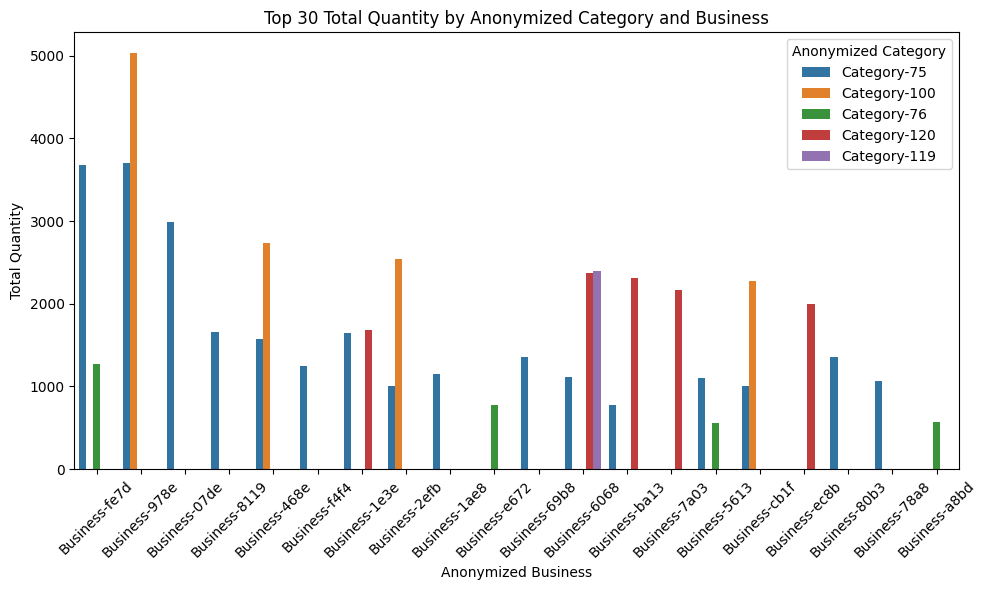

In [14]:
# Bar Chart for Total Quantity
plt.figure(figsize=(10, 6))
sns.barplot(data=top_30, x='ANONYMIZED BUSINESS', y='Total_Quantity', hue='ANONYMIZED CATEGORY')
plt.title('Top 30 Total Quantity by Anonymized Category and Business')
plt.xlabel('Anonymized Business')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.legend(title='Anonymized Category')
plt.tight_layout()
plt.show()

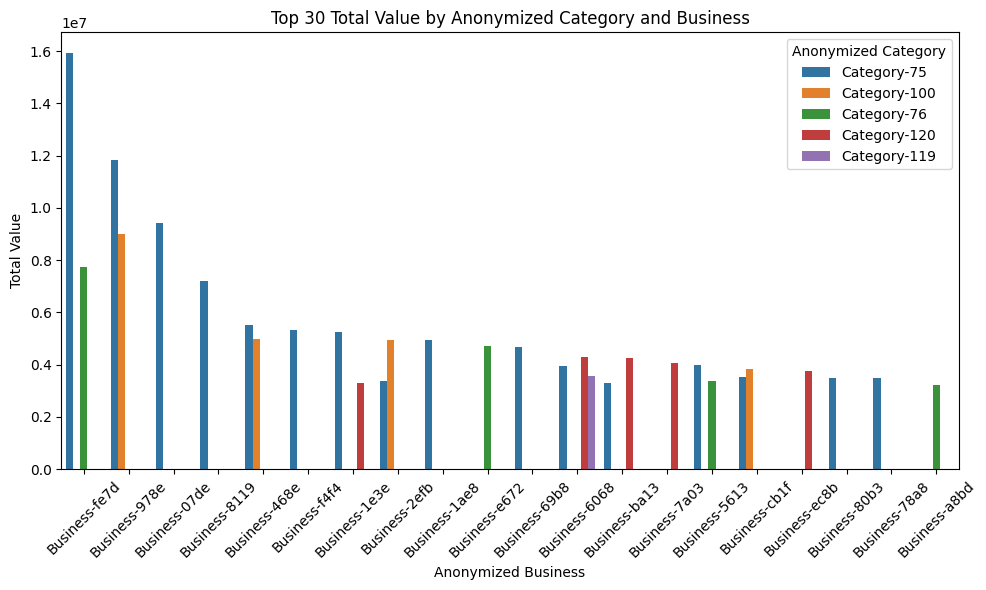

In [15]:
# Bar Chart for Total Value
plt.figure(figsize=(10, 6))
sns.barplot(data=top_30, x='ANONYMIZED BUSINESS', y='Total_Value', hue='ANONYMIZED CATEGORY')
plt.title('Top 30 Total Value by Anonymized Category and Business')
plt.xlabel('Anonymized Business')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.legend(title='Anonymized Category')
plt.tight_layout()
plt.show()

### 2. Trend Over Time

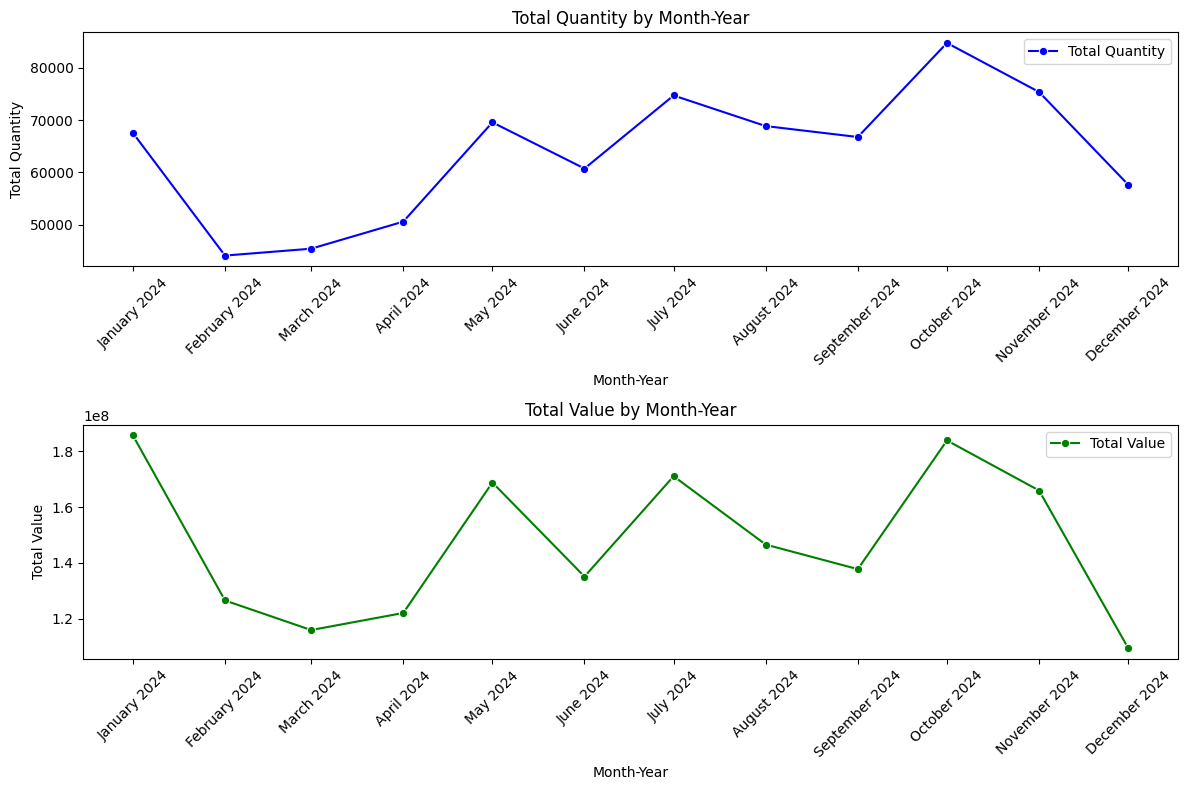

In [16]:
# Group by 'Month-Year' to get total quantity and value
monthly_data = data.groupby('Month-Year').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('VALUE', 'sum')
).reset_index()

# Convert 'Month-Year' back to a datetime format for sorting, using the first of the month
monthly_data['Month-Year-Datetime'] = pd.to_datetime(monthly_data['Month-Year'], format='%B %Y')

# Sort by 'Month-Year-Datetime' to ensure chronological order
monthly_data = monthly_data.sort_values('Month-Year-Datetime')

# Plotting Total Quantity and Total Value by Month-Year
plt.figure(figsize=(12, 8))

# Plot Total Quantity
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_data, x='Month-Year-Datetime', y='Total_Quantity', marker='o', color='blue', label='Total Quantity')
plt.title('Total Quantity by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')
plt.xticks(monthly_data['Month-Year-Datetime'], labels=monthly_data['Month-Year'], rotation=45)

# Plot Total Value
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_data, x='Month-Year-Datetime', y='Total_Value', marker='o', color='green', label='Total Value')
plt.title('Total Value by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.xticks(monthly_data['Month-Year-Datetime'], labels=monthly_data['Month-Year'], rotation=45)

# Layout adjustments
plt.tight_layout()
plt.show()

### 3. Performance Analysis:

#### Top 5 most frequently purchased products (based on Quantity).

In [17]:
# Group by 'ANONYMIZED PRODUCT' and sum the quantities
product_quantity = data.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().reset_index()

# Sort the data by 'QUANTITY' in descending order
top_products = product_quantity.sort_values('QUANTITY', ascending=False).head(5)

# Display the top 5 products
top_products

,ANONYMIZED PRODUCT,QUANTITY
338,Product-66e0,46957
750,Product-e805,42602
476,Product-8f75,37566
127,Product-29ee,35940
213,Product-4156,28487


#### Top 5 most valuable products (based on Value).

In [18]:
# Group by 'ANONYMIZED PRODUCT' and sum the values
product_value = data.groupby('ANONYMIZED PRODUCT')['VALUE'].sum().reset_index()

# Sort the data by 'VALUE' in descending order
top_valuable_products = product_value.sort_values('VALUE', ascending=False).head(5)

# Display the top 5 most valuable products
top_valuable_products

,ANONYMIZED PRODUCT,VALUE
750,Product-e805,262787281.0
476,Product-8f75,158797460.0
338,Product-66e0,70704225.0
127,Product-29ee,68248274.0
213,Product-4156,56956007.0


# Section 3: Advanced Analysis

### 1. Customer segmentation

### Aggregate data

In [19]:
total_quantity = data.groupby('ANONYMIZED BUSINESS')['QUANTITY'].sum()
total_value = data.groupby('ANONYMIZED BUSINESS')['VALUE'].sum()
transaction_frequency = data.groupby('ANONYMIZED BUSINESS')['DATE'].nunique()

### Create Metrics Dataframe

In [20]:
customer_metrics = pd.DataFrame({
    'Total Quantity': total_quantity,
    'Value': total_value,
    'Transaction Frequency': transaction_frequency
})

# Display the first few rows of the new dataframe
customer_metrics.head()

,Total Quantity,Value,Transaction Frequency
ANONYMIZED BUSINESS,,,
Business-0000,8,10445.0,5
Business-0005,1,2645.0,1
Business-0029,26,77340.0,4
Business-003d,98,221761.0,16
Business-0072,127,225056.0,54


### Normalize the Data

In [21]:
# This is done so that segmentation isn't biased towards one feature- scale using MinMax scalling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
customer_metrics_scaled = scaler.fit_transform(customer_metrics)

# Create a DataFrame with the scaled values
customer_metrics_scaled_df = pd.DataFrame(customer_metrics_scaled, columns=customer_metrics.columns)

### Segmentation

In [22]:
# Define the thresholds for segmentation
value_thresholds = customer_metrics['Value'].quantile([0.33, 0.66])
total_quantity_thresholds = customer_metrics['Total Quantity'].quantile([0.33, 0.66])
frequency_thresholds = customer_metrics['Transaction Frequency'].quantile([0.33, 0.66])

# Define a function to classify customers into groups
def classify_customer(row):
    if row['Value'] > value_thresholds[0.66] and row['Total Quantity'] > total_quantity_thresholds[0.66] and row['Transaction Frequency'] > frequency_thresholds[0.66]:
        return 'High Value'
    elif row['Value'] > value_thresholds[0.33] and row['Total Quantity'] > total_quantity_thresholds[0.33] and row['Transaction Frequency'] > frequency_thresholds[0.33]:
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply the classification function
customer_metrics['Segment'] = customer_metrics.apply(classify_customer, axis=1)

# Display the top 10 segmented customers
customer_metrics.head(10)

,Total Quantity,Value,Transaction Frequency,Segment
ANONYMIZED BUSINESS,,,,
Business-0000,8,10445.0,5,Low Value
Business-0005,1,2645.0,1,Low Value
Business-0029,26,77340.0,4,Medium Value
Business-003d,98,221761.0,16,Medium Value
Business-0072,127,225056.0,54,High Value
Business-0078,317,1056525.0,159,High Value
Business-007a,2,4010.0,2,Low Value
Business-0086,6,11200.0,2,Low Value
Business-00a2,9,20685.0,5,Medium Value


### Recommendations for Engagement with Each Group:

The goal is to strengthen relationships with High Value customers, grow the Medium Value group, and encourage Low Value customers to become more engaged.

### 1. High Value Customers:

#### Characteristics:
Large volume of purchases, frequent transactions, high spend.

#### Engagement Strategy:

1. **Exclusive Benefits:** Offer them VIP status, early access to new products, or exclusive discounts. They are your most loyal customers, so making them feel valued is key.

2. **Loyalty Programs:** Reward them for continued business with a points system or tiered benefits (e.g., the more they spend, the better the rewards).

3. **Personalized Communication:** Send personalized emails, updates, and recommendations that align with their purchasing behavior.
Priority Customer Service: Offer them premium customer support (e.g., dedicated account managers, priority assistance) to make them feel special.


### 2. Medium Value Customers:

#### Characteristics:
Moderate volume of purchases, occasional repeat business, could buy more.

#### Engagement Strategy:

1. **Targeted Promotions:** Offer discounts or deals to encourage repeat purchases. These customers might respond well to special offers that are personalized.

2. **Cross-Selling and Upselling:** Suggest products that complement what they've purchased before. These customers are more likely to make additional purchases if the suggestions are relevant.

3. **Engagement Campaigns:** Send personalized product recommendations based on their past purchases, or invite them to join a loyalty program to increase their engagement.

4 **Nurture Campaigns:** Engage them with educational content, special deals, or reminders about the benefits of buying more frequently.


### 3. Low Value Customers:

#### Characteristics:
Infrequent purchases, low spend, lower engagement.

#### Engagement Strategy:

1. **Incentivize Larger Purchases:** Provide discounts or bundle deals to encourage them to buy more in a single transaction.

2 **Re-engagement Campaigns:** If they haven’t purchased in a while, send re-engagement emails offering special deals or exclusive promotions to spark their interest.

3. **Discount Offers:** Give them a reason to buy again, such as a one-time discount on their next order, or a coupon to encourage repeat business.

4. **Survey and Feedback:** Consider asking why they aren’t purchasing more or more frequently. Their responses could help you understand how to better engage them (e.g., product offerings, pricing issues, etc.).



### 2. Forecasting

#### Find the monthly values

In [30]:
# Aggregating by 'Month-Year' and summing the 'VALUE' (total sales for each month)
monthly_sales = data.groupby('Month-Year')['VALUE'].sum()

# Display the aggregated monthly sales
print(monthly_sales.head())

Month-Year
April 2024       122110750.0
August 2024      146581003.0
December 2024    109549774.0
February 2024    126579702.0
January 2024     185626186.0
Name: VALUE, dtype: float64


In [31]:
# Convert 'Month-Year' to datetime format (make sure we can aggregate correctly)
monthly_sales.index = pd.to_datetime(monthly_sales.index, format='%B %Y')

# Display the new monthly sales data
print(monthly_sales.head())


Month-Year
2024-04-01    122110750.0
2024-08-01    146581003.0
2024-12-01    109549774.0
2024-02-01    126579702.0
2024-01-01    185626186.0
Name: VALUE, dtype: float64


#### Stationary Check

In [38]:
# ARIMA models require the data to be stationary, meaning its properties like mean and variance do not change over time.
# check for stationarity with a Dickey-Fuller test. 

In [35]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check for stationarity
result = adfuller(monthly_sales)

# Print the results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If the p-value is greater than 0.05, the series is likely non-stationary

ADF Statistic: -2.9876664027564854
p-value: 0.03606236696285062


* Since the p-value is less than 0.05, the series is stationary

#### Fit the ARIMA Model

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (using order (1, 1, 1) for simplicity: p=1, d=1, q=1)
arima_model = ARIMA(monthly_sales, order=(1, 1, 1))

# Fit the model
arima_fitted_model = arima_model.fit()

#### Forecast the next 3 Months

In [48]:
# Forecast the next 3 months
forecast = arima_fitted_model.forecast(steps=3)

# Display the forecasted values
print("Forecasted Sales for the Next 3 Months:")
print(forecast)

Forecasted Sales for the Next 3 Months:
12    1.296901e+08
13    1.323863e+08
14    1.314890e+08
Name: predicted_mean, dtype: float64


* This corresponds to the month of January, Feb, March 2025 respectively
* Jan, 2025: 129,690,100
* Feb, 2025: 132,386,300
* March 2025: 131,489,000.

### 3. Anomaly Detection

#### 1. Calculate Moving Average & Standard Deviation for Quantity and Value

In [49]:
# calculate the rolling average and rolling standard deviation for both Quantity and Sales Value, using a 7-day window for smoothing.

In [52]:
# Calculate a 7-day moving average for Quantity and Sales Value
data['QUANTITY_MA'] = data['QUANTITY'].rolling(window=7).mean()
data['SALES_VALUE_MA'] = data['VALUE'].rolling(window=7).mean()

# Calculate the 7-day moving standard deviation for Quantity and Sales Value
data['QUANTITY_STD'] = data['QUANTITY'].rolling(window=7).std()
data['SALES_VALUE_STD'] = data['VALUE'].rolling(window=7).std()

#### 2. Identify Anomalies

In [54]:
# Set threshold for detecting anomalies (e.g., 2 standard deviations)
threshold = 2

# Identify anomalies in Quantity
data['QUANTITY_ANOMALY'] = (data['QUANTITY'] > data['QUANTITY_MA'] + threshold * data['QUANTITY_STD']) | \
                           (data['QUANTITY'] < data['QUANTITY_MA'] - threshold * data['QUANTITY_STD'])

# Identify anomalies in Sales Value
data['SALES_VALUE_ANOMALY'] = (data['VALUE'] > data['SALES_VALUE_MA'] + threshold * data['SALES_VALUE_STD']) | \
                              (data['VALUE'] < data['SALES_VALUE_MA'] - threshold * data['SALES_VALUE_STD'])


In [67]:
# Ensure that 'DATE' column is in datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the 'DATE' column as the index
data.set_index('DATE', inplace=True)


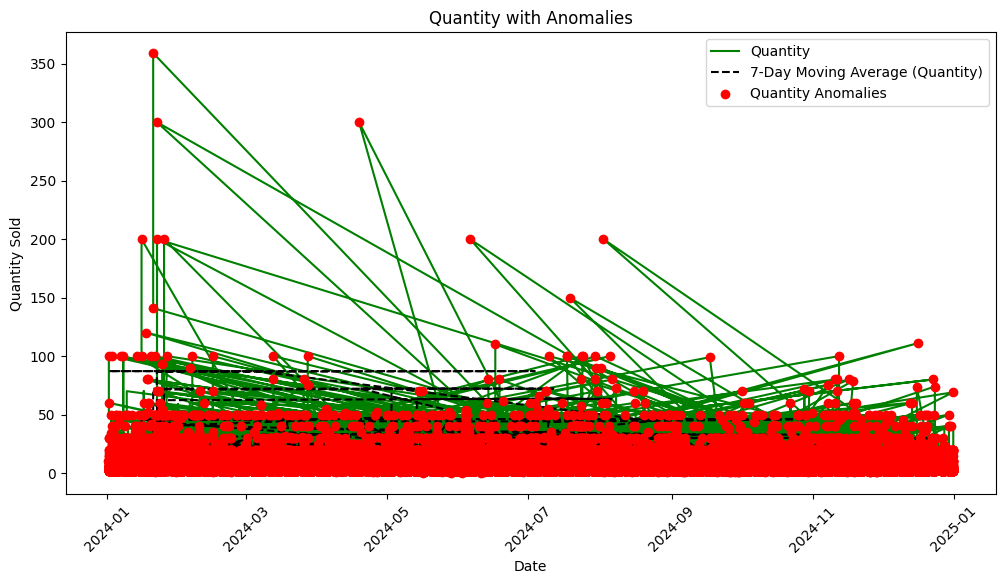

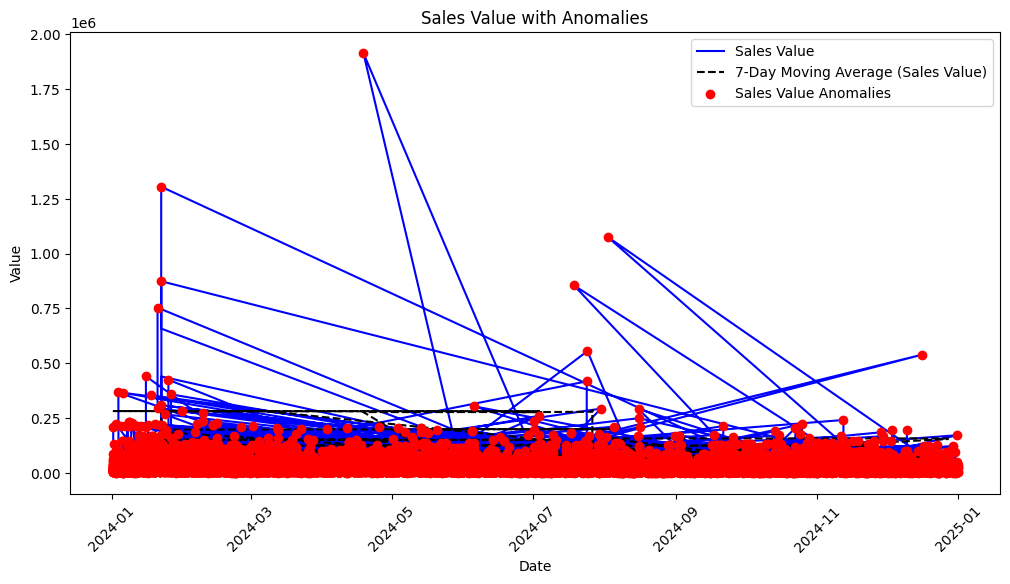

In [69]:
import matplotlib.pyplot as plt

# Plot Quantity and its anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['QUANTITY'], label='Quantity', color='green')
plt.plot(data.index, data['QUANTITY_MA'], label='7-Day Moving Average (Quantity)', color='black', linestyle='--')

# Highlight anomalies in Quantity
plt.scatter(data.index[data['QUANTITY_ANOMALY']], data['QUANTITY'][data['QUANTITY_ANOMALY']], color='red', label='Quantity Anomalies', zorder=5)

plt.title('Quantity with Anomalies')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot Sales Value and its anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['VALUE'], label='Sales Value', color='blue')
plt.plot(data.index, data['SALES_VALUE_MA'], label='7-Day Moving Average (Sales Value)', color='black', linestyle='--')

# Highlight anomalies in Sales Value
plt.scatter(data.index[data['SALES_VALUE_ANOMALY']], data['VALUE'][data['SALES_VALUE_ANOMALY']], color='red', label='Sales Value Anomalies', zorder=5)

plt.title('Sales Value with Anomalies')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### Possible Reasons

### Spikes in Sales/Quantity:

1. **Promotions/Discounts:** Flash sales or special discounts cause a surge in sales.
2. **Seasonal Demand:** Holidays or specific times of year increase demand (e.g., Christmas, Back-to-School).
3. **New Product Launch:** New product introductions lead to higher interest and sales.
4. **External Events:** Media exposure or social media trends can boost sales.
5. **Stock Availability:** Restocking popular items or resolving stockouts increases sales.

### Drops in Sales/Quantity:

1. **Stockouts/Supply Chain Issues:** Running out of stock or supply delays reduce sales.
2. **Pricing Changes:** Price increases may deter customers, leading to lower sales.
3. **Competitor Actions:** A competitor’s better deal can cause a sales drop.
4. **Negative Feedback:** Poor reviews or quality issues reduce demand.
5. **Economic Factors:** Recessions or market downturns impact consumer spending.
6. **Seasonal Declines:** Some products naturally decline after peak seasons (e.g., winter coats post-winter).

### Sudden Fluctuations:

1. **Product Returns:** High return rates can cause short-term sales fluctuations.
2. **Marketing/Ad Impact:** Changes in advertising can cause rapid sales increases or decreases.
3. **System Errors:** Pricing errors or glitches may cause outlier spikes or drops.

### Outliers:
Can be caused by data errors, bulk orders, or rare significant events.

### 4. Correlation Analysis:

In [70]:
import pandas as pd

# Assuming the data is already loaded in the DataFrame 'data'

# Calculate the correlation between Quantity and Sales Value
correlation = data['QUANTITY'].corr(data['VALUE'])

# Display the correlation result
print(f"Correlation between Quantity and Sales Value: {correlation:.2f}")


Correlation between Quantity and Sales Value: 0.84


* A correlation coefficient of 0.84 between Quantity and Sales Value suggests a strong positive linear relationship between the two variables.
* The coefficient 0.84 is quite high (close to 1), which means the relationship between Quantity and Sales Value is strong. However, it's not a perfect correlation (which would be exactly 1), so other factors might still influence the Sales Value in addition to the Quantity sold.
* Since the correlation is positive and strong, it suggests a linear relationship. In other words, for every unit increase in Quantity, there’s a consistent increase in Sales Value.

#### Visualizing the Relationship

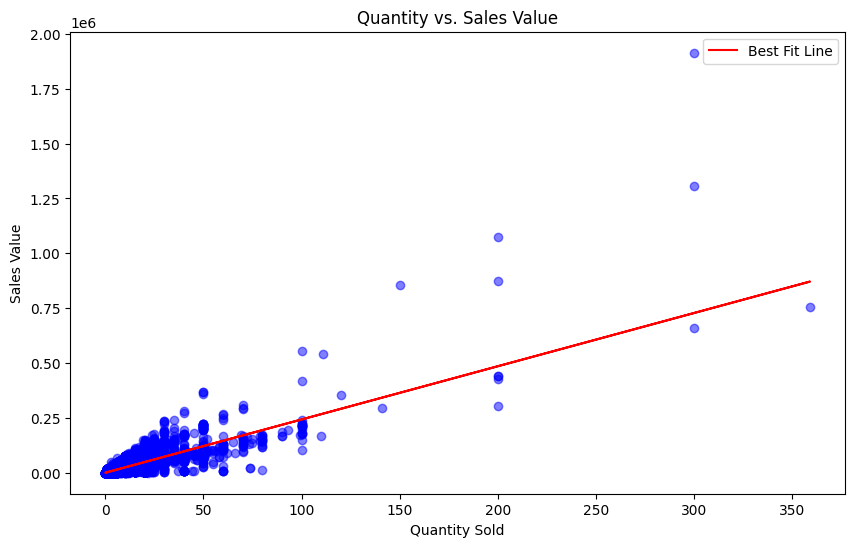

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of Quantity vs. Sales Value
plt.figure(figsize=(10, 6))
plt.scatter(data['QUANTITY'], data['VALUE'], color='blue', alpha=0.5)

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(data['QUANTITY'], data['VALUE'], 1)  # 1 means linear fit

# Generate the y-values for the best fit line
best_fit_line = slope * data['QUANTITY'] + intercept

# Plot the line of best fit in red
plt.plot(data['QUANTITY'], best_fit_line, color='red', label='Best Fit Line')

# Add title and labels
plt.title('Quantity vs. Sales Value')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Value')

# Show the plot
plt.legend()
plt.show()


* As quantity sold increase, the sales value also increases